In [2]:
import geopandas as gpd
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
ejblocks = gpd.read_file("../data/joins/ejblocks.shp.zip")

In [4]:
# # useful if you forget what is available
# for col in ejblocks.columns:
#     print(col)

## MANOVA

In [5]:
from statsmodels.multivariate.manova import MANOVA
fit = MANOVA.from_formula('AC_5 + AC_10 + AC_15 + AC_20 + AC_30 + AC_45 + AC_60 ~ TC', data=ejblocks)
print(fit.mv_test())

                   Multivariate linear model
                                                               
---------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9915 7.0000 47130.0000 57.4314 0.0000
         Pillai's trace 0.0085 7.0000 47130.0000 57.4314 0.0000
 Hotelling-Lawley trace 0.0085 7.0000 47130.0000 57.4314 0.0000
    Roy's greatest root 0.0085 7.0000 47130.0000 57.4314 0.0000
---------------------------------------------------------------
                                                               
---------------------------------------------------------------
           TC           Value  Num DF   Den DF   F Value Pr > F
---------------------------------------------------------------
          Wilks' lambda 0.9987 7.0000 47130.0000  8.9872 0.0000
         Pillai's trace 0.0013 7.0000 47130.0000  8.9872 0.

## Creating Boolean Columns

In [6]:
cols = ["AC_5","AC_10","AC_15","AC_20","AC_30","AC_45","AC_60"]

In [7]:
ejblocks["TC_bool"] = ejblocks["TC"] > 0
for col in cols:
    ejblocks[col+"_bool"] = ejblocks[col] == 0

## 10-Minute Walk Analysis

In [8]:
tab = pd.crosstab(ejblocks["TC_bool"], ejblocks["AC_10_bool"], ejblocks["P1_001N"], aggfunc='sum')
table = sm.stats.Table2x2(tab)

print("Total Values:", int(np.sum(tab.values)))
print(table.table_orig)
print(table.summary())
print(table.test_nominal_association())
print("Probability of No Conserved Land w/in 10-Minute Walk:", table.marginal_probabilities[1])

Total Values: 1362359
AC_10_bool     False     True 
AC_10_bool                    
False       186322.0  803751.0
True         64507.0  307779.0
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        1.106       1.095 1.117   0.000
Log odds ratio    0.101 0.005 0.091 0.111   0.000
Risk ratio        1.086       1.077 1.095   0.000
Log risk ratio    0.083 0.004 0.074 0.091   0.000
-------------------------------------------------
df          1
pvalue      0.0
statistic   400.7989688089026
Probability of No Conserved Land w/in 10-Minute Walk: AC_10_bool
False    0.184114
True     0.815886
dtype: float64


Text(0.5, 1.0, 'Red = No Conserved Land w/in 10-Minute Walk')

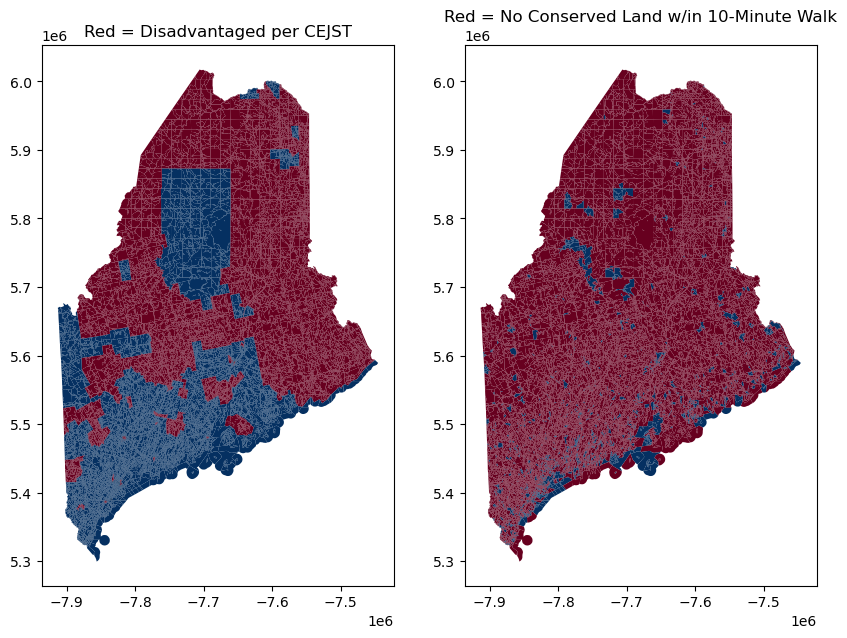

In [9]:
fig, axs = plt.subplots(1,2, figsize=(10,8))
ejblocks.plot("TC_bool", cmap="RdBu_r", ax=axs[0])
ejblocks.plot("AC_10_bool", cmap="RdBu_r", ax=axs[1])
axs[0].set_title("Red = Disadvantaged per CEJST")
axs[1].set_title("Red = No Conserved Land w/in 10-Minute Walk")

## 60-Minute Walk Analysis

In [10]:
tab = pd.crosstab(ejblocks["TC_bool"], ejblocks["AC_60_bool"], ejblocks["P1_001N"], aggfunc='sum')
table = sm.stats.Table2x2(tab)

print("Total Values:", int(np.sum(tab.values)))
print(table.table_orig)
print(table.summary())
print(table.test_nominal_association())
print(*table.marginal_probabilities)
print("Probability of No Conserved Land w/in 60-Minute Walk:", table.marginal_probabilities[1])

Total Values: 1362359
AC_60_bool     False     True 
AC_60_bool                    
False       793043.0  197030.0
True        213577.0  158709.0
               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        2.991       2.967 3.015   0.000
Log odds ratio    1.096 0.004 1.087 1.104   0.000
Risk ratio        1.396       1.392 1.400   0.000
Log risk ratio    0.334 0.001 0.331 0.337   0.000
-------------------------------------------------
df          1
pvalue      0.0
statistic   72452.25410448338
AC_60_bool
False    0.726734
True     0.273266
dtype: float64 AC_60_bool
False    0.73888
True     0.26112
dtype: float64
Probability of No Conserved Land w/in 60-Minute Walk: AC_60_bool
False    0.73888
True     0.26112
dtype: float64


Text(0.5, 1.0, 'Red = No Conserved Land w/in 60-Minute Walk')

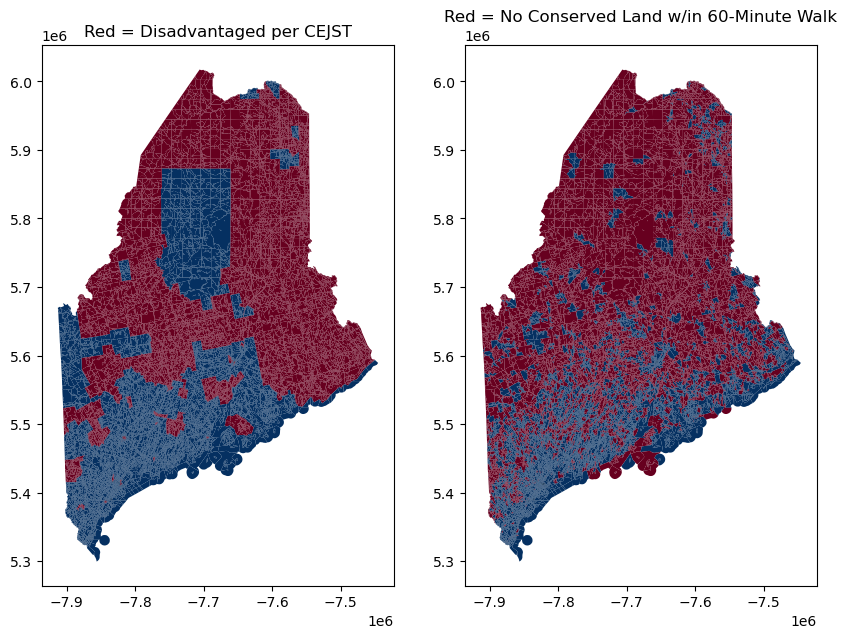

In [11]:
fig, axs = plt.subplots(1,2, figsize=(10,8))
ejblocks.plot("TC_bool", cmap="RdBu_r", ax=axs[0])
ejblocks.plot("AC_60_bool", cmap="RdBu_r", ax=axs[1])
axs[0].set_title("Red = Disadvantaged per CEJST")
axs[1].set_title("Red = No Conserved Land w/in 60-Minute Walk")

## Checking Population and Population Density Effects

In [20]:
fit = MANOVA.from_formula('AC_10 + AC_60 ~ TC + P1_001N + POPDENSE + TC*POPDENSE + TC*P1_001N', data=ejblocks)
print(fit.mv_test())

                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.9954 2.0000 43174.0000 100.7740 0.0000
         Pillai's trace 0.0046 2.0000 43174.0000 100.7740 0.0000
 Hotelling-Lawley trace 0.0047 2.0000 43174.0000 100.7740 0.0000
    Roy's greatest root 0.0047 2.0000 43174.0000 100.7740 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
            TC           Value  Num DF   Den DF   F Value Pr > F
----------------------------------------------------------------
           Wilks' lambda 0.9994 2.0000 43174.0000 13.2724 0.0000
          Pillai's trace 0.0006 2.0000 43174.

## Linear Discriminant Analysis